**1. 입력 배치 데이터 $X$, 가중치 행렬 $W$, 편향 벡터$B$가
$$
X=\begin{pmatrix}1&0\\0&1\\1&1 \end{pmatrix} \qquad W=\begin{pmatrix} 1&2&3 \\ 4&5&6 \end{pmatrix}, \qquad B=(7,8,9)
$$
와 같이 주어져 있다.**

**(i) 흘러들어온 미분 값이
$$
{\partial L \over \partial Y}=\begin{pmatrix} 2&1&-1\\1&0&0\\0&0&1 \end{pmatrix}
$$
일 때, Affine변환의 계산그래프
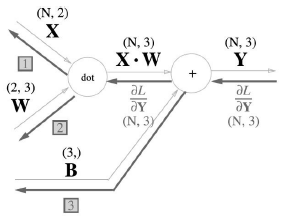
를 이용하여 편미분
$$
{\partial L \over \partial X}, \quad {\partial L \over \partial W},\quad {\partial L \over \partial B}
$$
의 값을 각각 구하시오.**

흘러들어온 미분 $\partial L \over \partial y$이 덧셈노드는 그냥 통과한후 아래쪽으로 흘러 내려갑니다.  
$B$의 모양과 일치해야 하도록 각 열을 더하면 편향에 대한 미분
$$
{\partial L \over \partial B} = [2+1+0,1+0+0,-1+0+1]=[3,1,0]
$$
을 얻습니다.

흘러들어온 미분 $\partial L \over \partial y$이 덧셈노드는 그냥 통과한후 왼쪽으로 흘러갑니다.  
곱셈노드에서 아래쪽으로 가면 윗쪽 순전파를 곱하고 윗쪽으로 가면 아래쪽 순전파를 곱해서 미분
$$
\begin{aligned}
{\partial L \over \partial W} &= X^T {\partial L \over \partial y} =
\begin{pmatrix}1&0&1\\0&1&1\end{pmatrix}
\begin{pmatrix} 2&1&-1\\1&0&0\\0&0&1 \end{pmatrix} =
\begin{pmatrix}2&1&0\\1&0&1\end{pmatrix} \\
{\partial L \over \partial X} &= {\partial L \over \partial y} W^T =
\begin{pmatrix} 2&1&-1\\1&0&0\\0&0&1 \end{pmatrix}
\begin{pmatrix}1&4\\2&5\\3&6\end{pmatrix}=
\begin{pmatrix}1&7\\1&4\\3&6\end{pmatrix}
\end{aligned}
$$
을 계산합니다.

**(ii) Affine 클래스로 검산하시오.**

In [1]:
import sys
sys.path.append('C://Users//HAN//Documents//Deep Learning from Scratch') # 각자의 경로로 수정해주세요.
import numpy as np
from common.layers import Affine

역전파 전에 항상 순전파를 실행해줍니다.  
대부분의 경우 역전파 계산에는 순전파 결과값이 필요합니다.  
그래서 순전파가 먼저 실행됬다고 가정하고 역전파 코드가 작성됩니다.

In [7]:
W = np.array([[1,2,3],[4,5,6]])
B = np.array([7,8,9])

affine = Affine(W,B)

x = np.array([[1,0],[0,1],[1,1]])

print("순전파\n"+str(affine.forward(x)))

순전파
[[ 8 10 12]
 [11 13 15]
 [12 15 18]]


역전파를 실행하면 데이터에 대한 미분이 리턴됩니다.  
가중치에 대한 미분과 편향에 대한 미분은 인스턴스 변수 `self.dW`와 `self.db`에 저장이 됩니다.

In [6]:
dout = np.array([[2,1,-1],[1,0,0],[0,0,1]])

print("데이터에 대한 미분\n"+str(affine.backward(dout)))
print("="*20)
print("가중치에 대한 미분\n"+str(affine.dW))
print("="*20)
print("편향에 대한 미분\n"+str(affine.db))

데이터에 대한 미분
[[1 7]
 [1 4]
 [3 6]]
가중치에 대한 미분
[[2 1 0]
 [1 0 1]]
편향에 대한 미분
[3 1 0]


**(iii) 학습률 1로 한번 학습하고 나면 가중치 행렬 $W$와 편향 벡터 $B$가 어떻게 업데이트 되겠는가?**

그레디언트를 구하고 나면 경사하강법으로 파라미터들을
$$
\begin{aligned}
W- \eta {\partial L \over \partial W} &= \begin{pmatrix} 1&2&3 \\ 4&5&6 \end{pmatrix}
- \begin{pmatrix}2&1&0\\1&0&1\end{pmatrix} = \begin{pmatrix} -1&1&3 \\ 3&5&5 \end{pmatrix} \\
B-{\partial L \over \partial B} &= (7,8,9) - (3,1,0) = (4,7,9)
\end{aligned}
$$
와 같이 업데이트 합니다.  
그러면 손실함수값이 작아지고 신경망의 성능은 올라갑니다.  
이것이 머신러닝입니다.

**2. 선형변환
$$
S(x_1,x_2,\cdots,x_n)=(x_n,x_1,x_2,\cdots,x_{n-1})
$$
을 생각하자. 이 선형변환으로 흘러들어오는 미분이 $(d_1,d_2,\cdots,d_n)$일 때, 역전파를 거쳐 밑으로 흘러가는 미분은
$$
(d_2,d_3,\cdots,d_n,d_1)
$$
임을 보이시오.**

선형변환은 Affine변환의 특별한 형태입니다.  
편향이 제로 벡터인 경우이죠.  
행렬 곱하기 형태
$$
S(x_1,x_2,\cdots,x_n)=(x_n,x_1,x_2,\cdots,x_{n-1}) =
\begin{pmatrix}x_1&x_2&\cdots&x_n\end{pmatrix}
\begin{pmatrix}0&1&0&0\cdots&0 \\0&0&1&0\cdots&0 \\ &&\vdots& \\ 0&0&0&0\cdots&1 \\ 1&0&0&0\cdots&0 \end{pmatrix}
$$
로 써서 가중치 행렬을 찾습니다.  
흘러들어온 미분에 가중치 행렬의 transpose를 곱하면 밑으로 흘려보내는 미분
$$
(d_1,d_2,\cdots,d_n) \begin{pmatrix}0&1&0&0\cdots&0 \\0&0&1&0\cdots&0 \\ &&\vdots& \\ 0&0&0&0\cdots&1 \\ 1&0&0&0\cdots&0 \end{pmatrix}^T
= (d_1,d_2,\cdots,d_n) \begin{pmatrix}0&0&\cdots&0&0&1\\1&0&\cdots&0&0&0 \\ &&\vdots& \\ 0&0&\cdots&1&0&0 \\ 0&0&\cdots&0&1&0\end{pmatrix}
= (d_2,d_3,\cdots,d_n,d_1)
$$
을 얻습니다.